<a href="https://colab.research.google.com/github/muneeb042/Skull-Stripping/blob/main/GeneralSkullStripping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

rawb to Pgm

In [ ]:
import struct

# Set the dimensions of the volume
width = 181
height = 217
depth = 181

# Open the input file in binary mode
with open("/content/drive/MyDrive/Colab Notebooks/SecondSem/t1_icbm_normal_1mm_pn3_rf20.rawb", "rb") as file:
    # Loop through each slice in the volume
    for z in range(depth):
        # Create a new PGM file for the slice
        with open(f"/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Pgm/slice_{z}.pgm", "w") as pgm_file:
            # Write the PGM file header
            pgm_file.write("P2\n")
            pgm_file.write("#\n")
            pgm_file.write(f"{width} {height}\n")
            pgm_file.write("255\n")

            # Loop through each row in the slice
            for y in range(height):
                # Read a row of data from the input file
                row_data = file.read(width)  # Each value is 1 byte
                # Unpack the row data into a list of integers
                values = struct.unpack(f"{width}B", row_data)
                # Find the maximum value in the input data
                max_value = max(values)
                # Scale the values down to the maximum range of 255
                scaled_values = [int(v * 255 / max_value) for v in values]

                # Convert each value to decimal and write it to the PGM file
                pgm_file.write(" ".join([str(v) for v in values]) + "\n")

Thresholded images

In [ ]:
import numpy as np

for i in range(181):
  # Open the PGM file and read the header
  with open(f'/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Pgm/slice_{i}.pgm', 'rb') as f:

            header = f.readline().decode('utf-8')
            hashv = f.readline().decode('utf-8')
            line = f.readline().decode('utf-8')
            width, height = [int(i) for i in line.split()]
            max_value = int(f.readline().decode('utf-8'))

            # Read the pixel data using np.loadtxt()
            pixel_data = np.loadtxt(f, dtype=np.uint8)

  # Reshape the pixel data into an image array
  if height*width != pixel_data.size:
      raise ValueError("Dimensions do not match size of pixel data")
  image = pixel_data.reshape((height, width))

  # Threshold the image to remove background noise
  threshold = np.mean(image)
  image = np.where(image > threshold, image, 0)

  # Add the missing information to the header
  header += '#' + '\n'
  header += str(width) + ' ' + str(height) + '\n'
  header += str(max_value) + '\n'

  # Save the thresholded image
  with open(f'/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Thresholded_images/thresholded_slice_{i}.pgm', 'wb') as f:
      f.write(header.encode('utf-8'))
      np.savetxt(f, image, fmt='%d')

Skullstripped images

In [ ]:
# Import the necessary libraries
import numpy as np
import cv2


for i in range(181):
  # Load the PGM file
  image = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Thresholded_images/thresholded_slice_{i}.pgm', cv2.IMREAD_GRAYSCALE)
  # Loop through each row in the image
  for row in range(image.shape[0]):
      start_point = None  # Variable to keep track of the start point of the positive valued pixel stream
      end_point = None  # Variable to keep track of the end point of the positive valued pixel stream

      # Loop through each column in the row from left to right
      for col in range(image.shape[1]):
          if int(image[row, col]) > 0 and start_point is None:
              start_point = col
          elif int(image[row, col]) == 0 and start_point is not None and end_point is None:  # Update end point only if not updated already
              if col + 2 < image.shape[1] and int(image[row, col + 1]) == 0 and int(image[row, col + 2]) == 0:  # Check for three consecutive pixels equal to 0
                  end_point = col
                  for c in range(start_point, end_point):
                      image[row, c] = np.uint8(0)
                  start_point = None  # Reset start point
                  end_point = None  # Reset end point
                  break

      # Loop through each column in the row from right to left
      for col in range(image.shape[1] - 1, -1, -1):
          if int(image[row, col]) > 0 and end_point is None:
              end_point = col
          elif int(image[row, col]) == 0 and end_point is not None and start_point is None:  # Update start point only if not updated already
              if col - 2 >= 0 and int(image[row, col - 1]) == 0 and int(image[row, col - 2]) == 0:  # Check for three consecutive pixels equal to 0
                  start_point = col
                  for c in range(end_point, start_point, -1):
                      image[row, c] = np.uint8(0)
                  start_point = None  # Reset start point
                  end_point = None  # Reset end point
                  break
  cv2.imwrite(f'/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Skull Stripped image/skull_stripped_{i}.pgm', image)



print("Skull stripping completed!")

Skull stripping completed!


slide  55


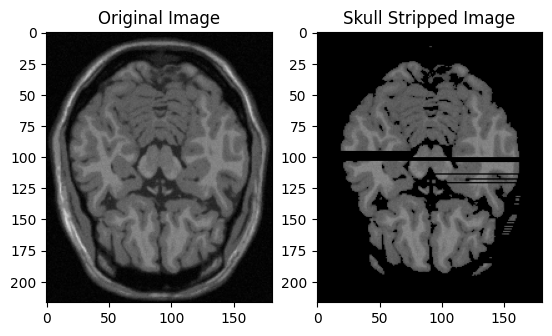

slide  56


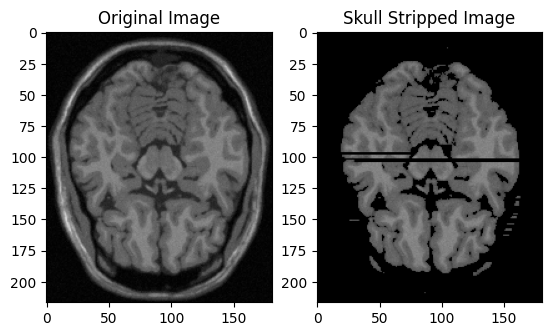

slide  57


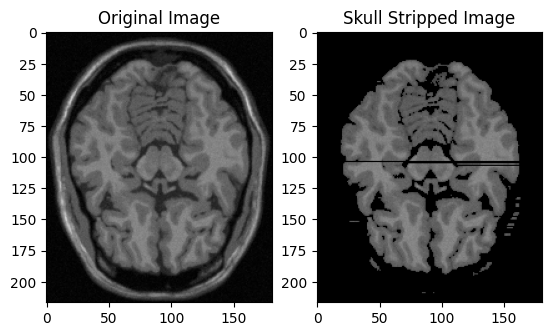

slide  58


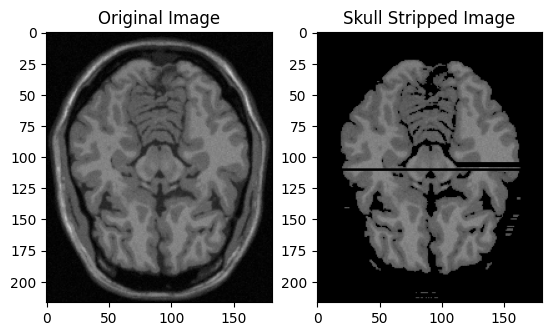

slide  59


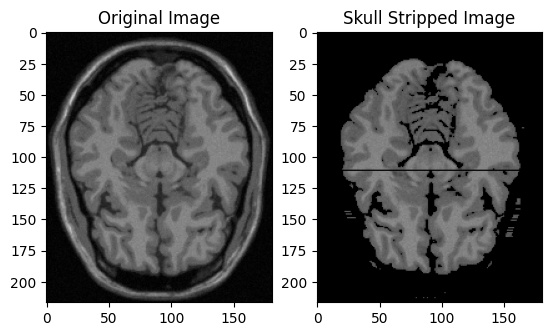

slide  60


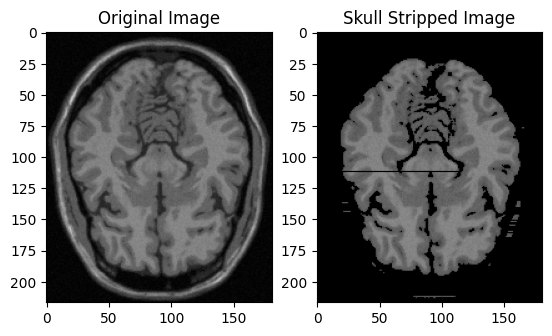

slide  61


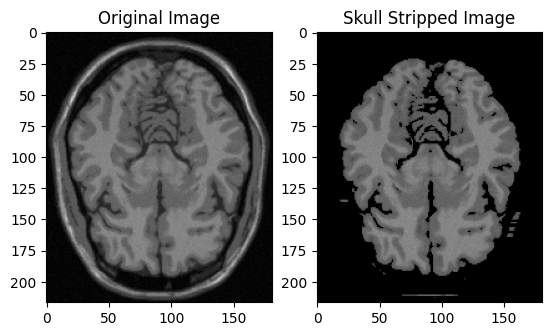

slide  62


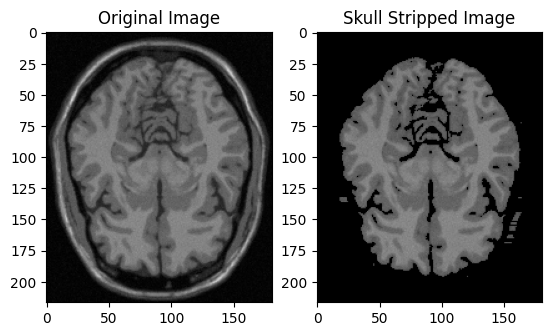

slide  63


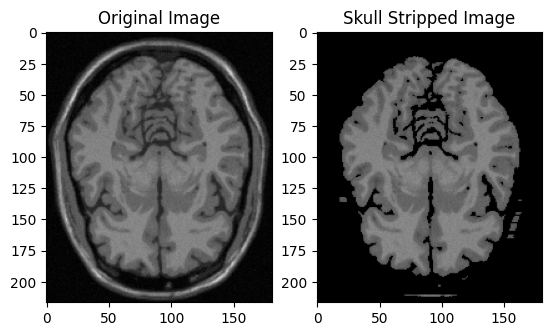

slide  64


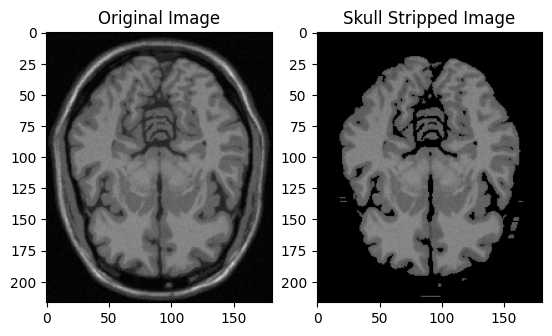

slide  65


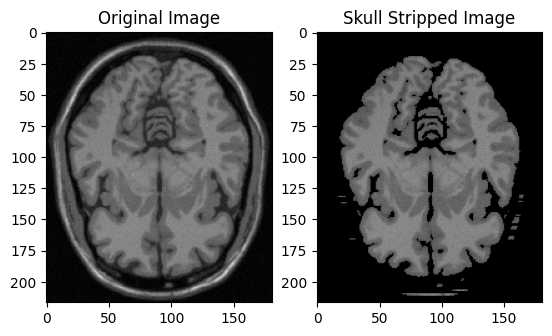

slide  66


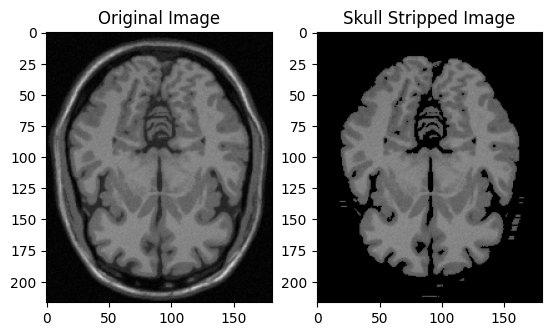

slide  67


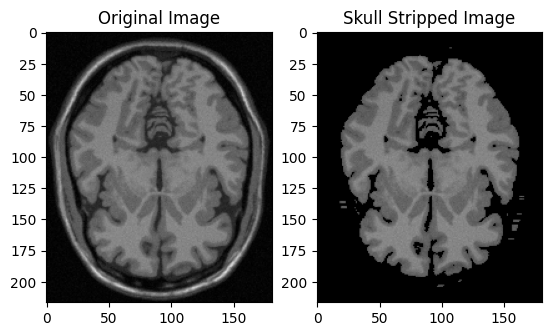

slide  68


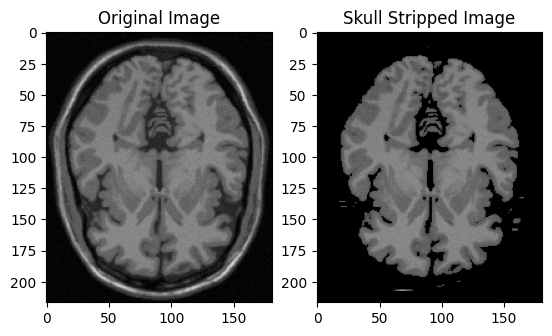

slide  69


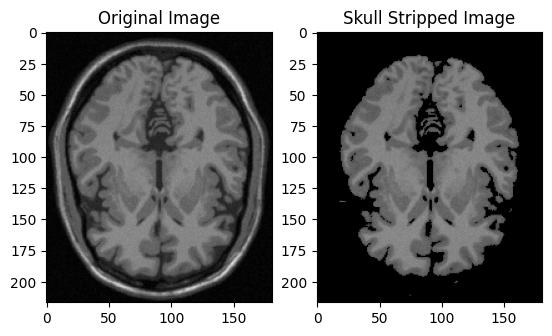

slide  70


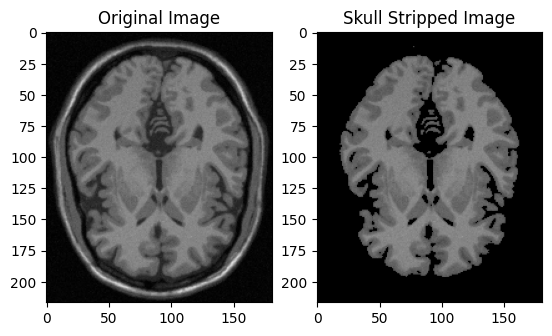

slide  71


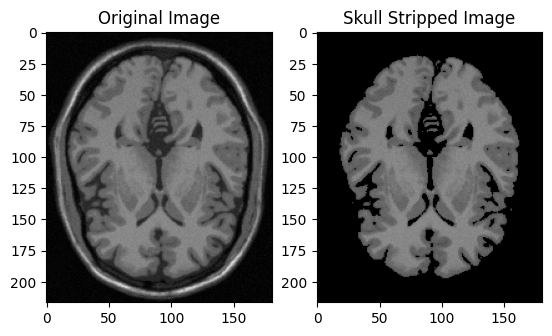

slide  72


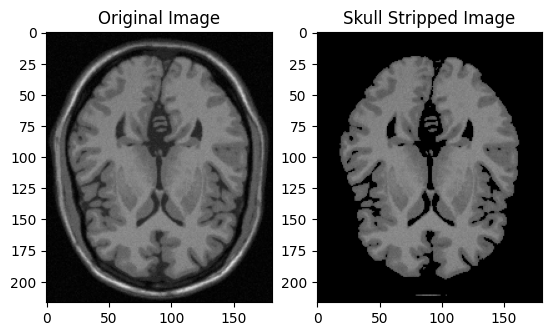

slide  73


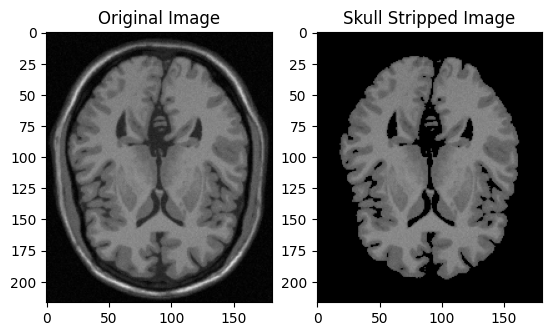

slide  74


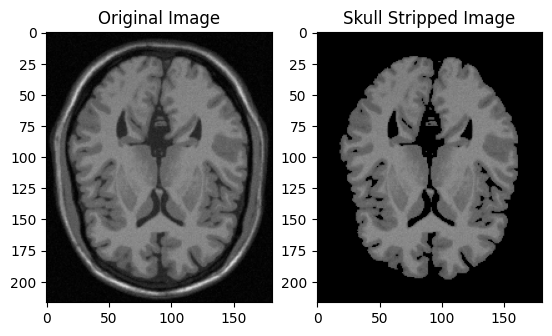

slide  75


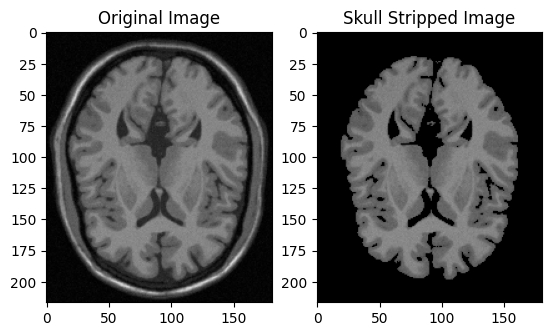

slide  76


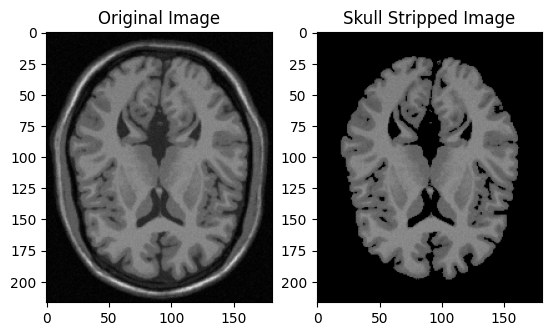

slide  77


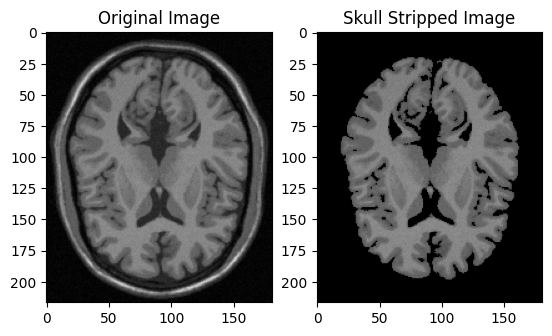

slide  78


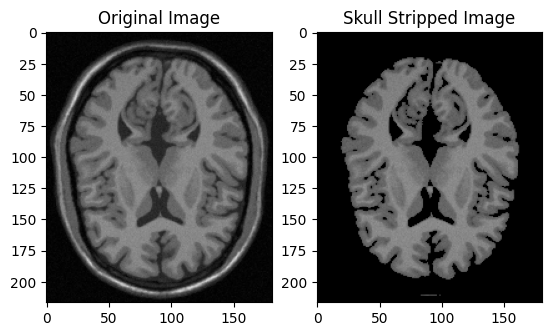

slide  79


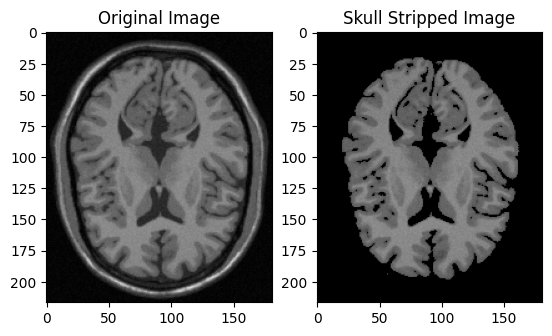

slide  80


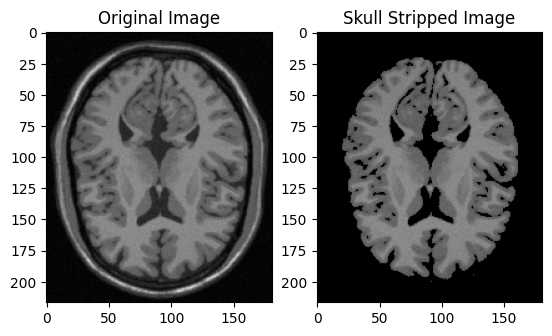

slide  81


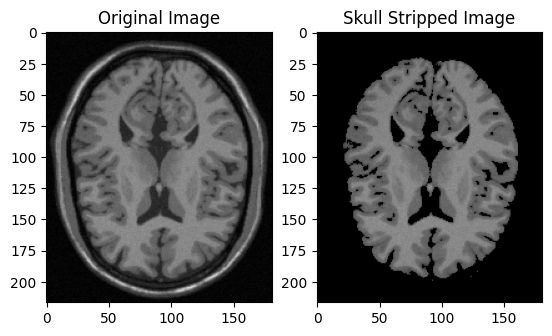

slide  82


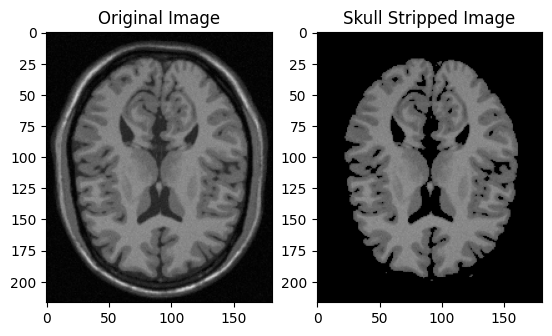

slide  83


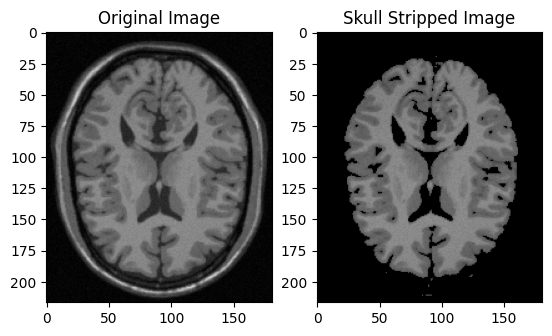

slide  84


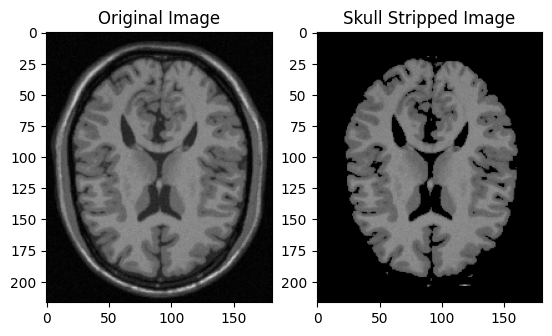

slide  85


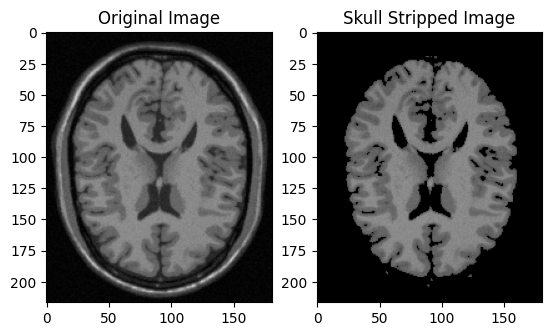

slide  86


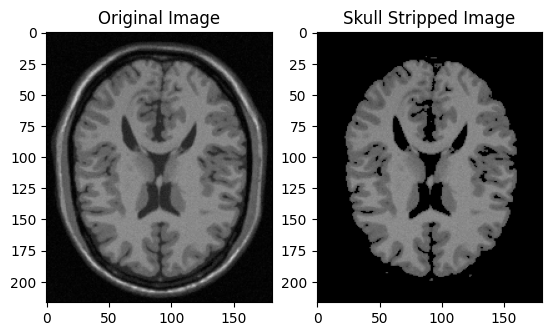

slide  87


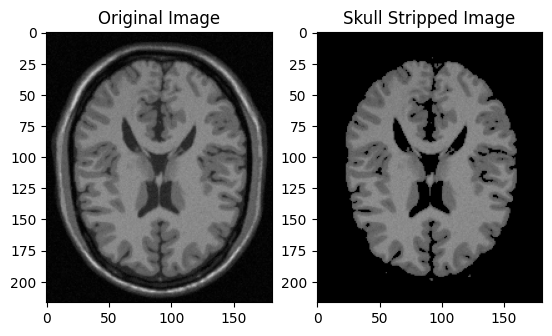

slide  88


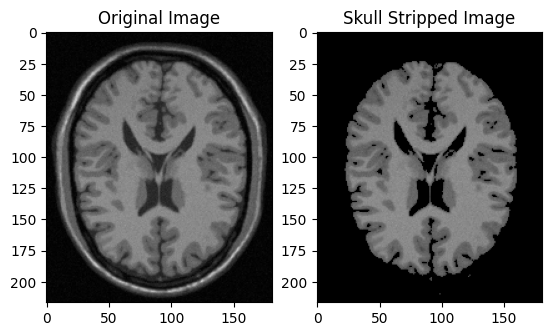

slide  89


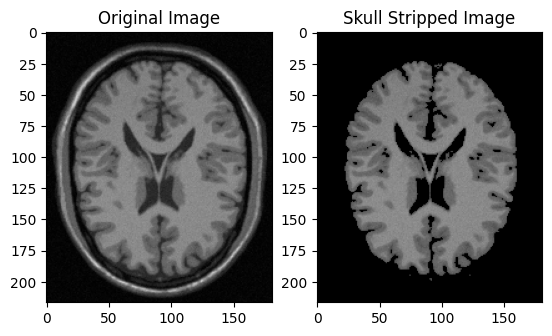

slide  90


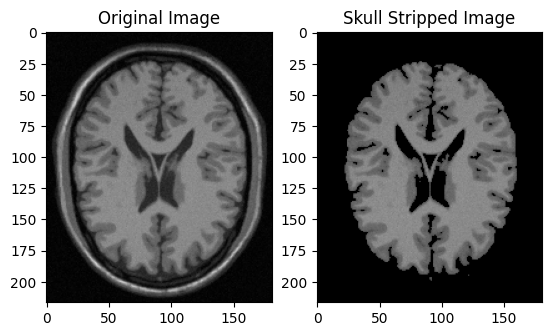

slide  91


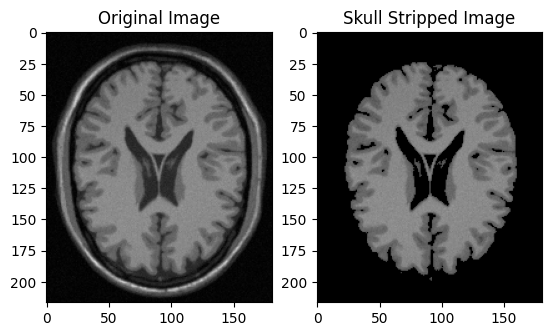

slide  92


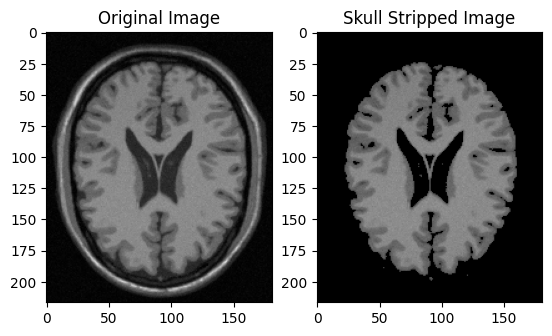

slide  93


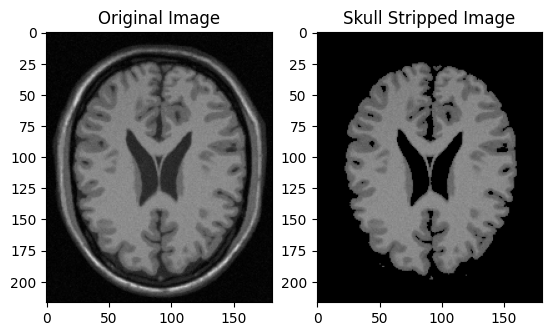

slide  94


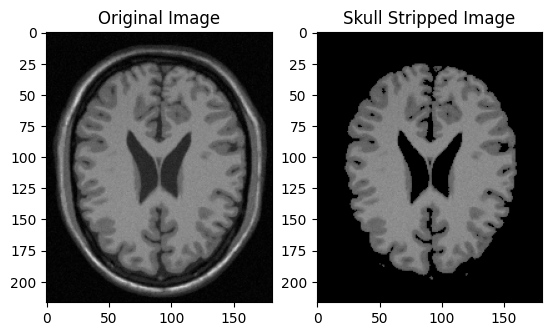

slide  95


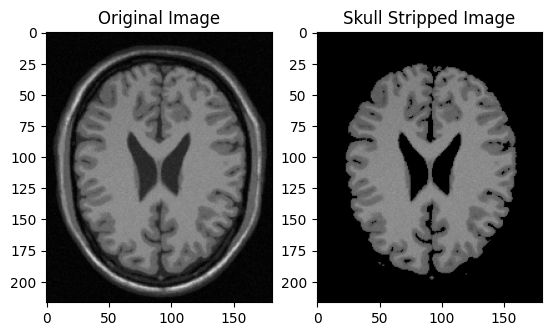

slide  96


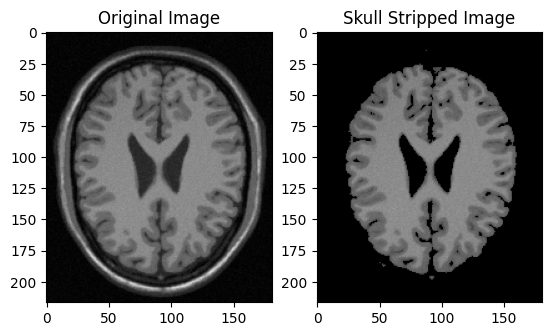

slide  97


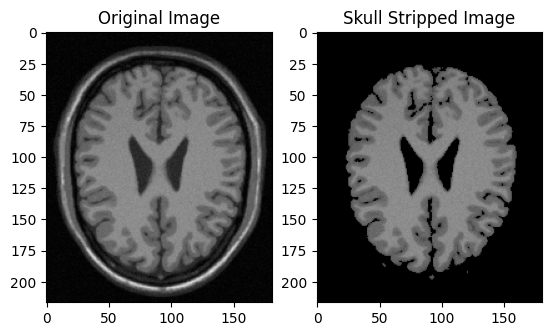

slide  98


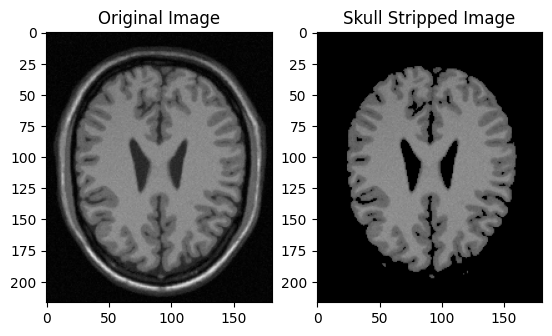

slide  99


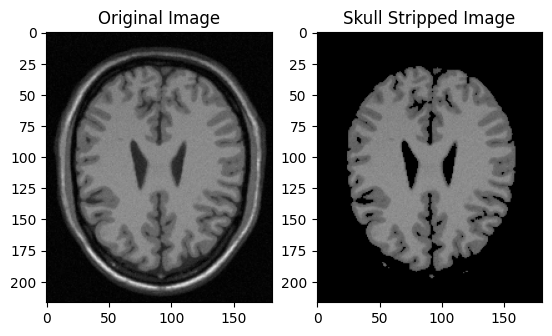

slide  100


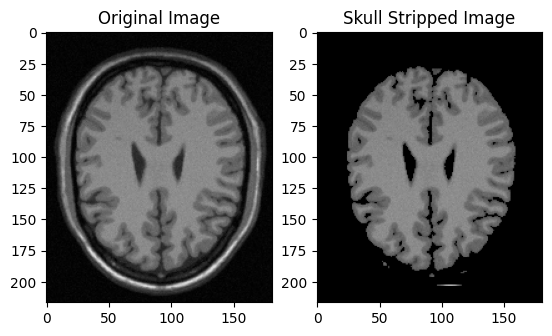

slide  101


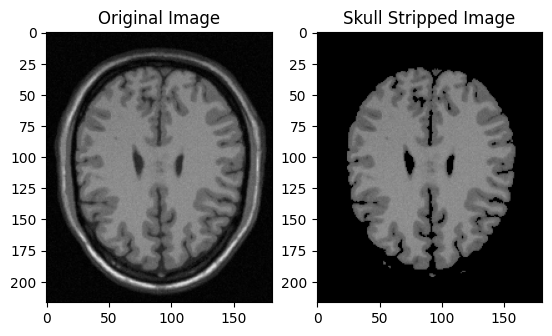

slide  102


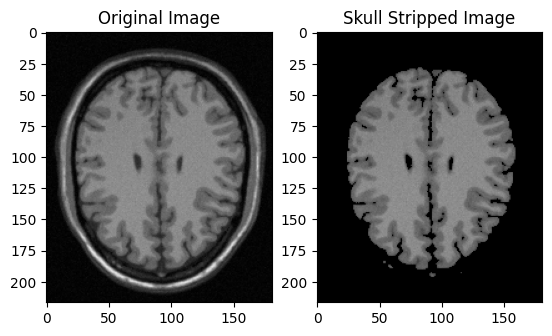

slide  103


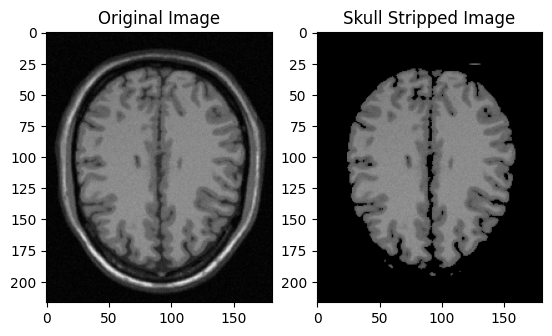

slide  104


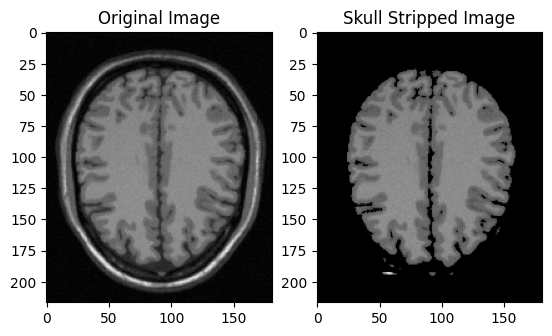

slide  105


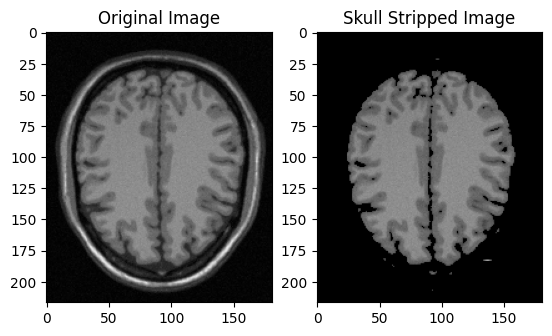

slide  106


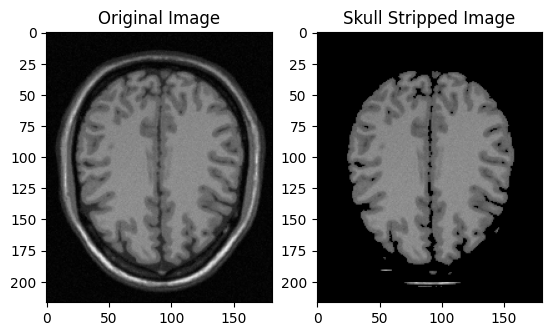

slide  107


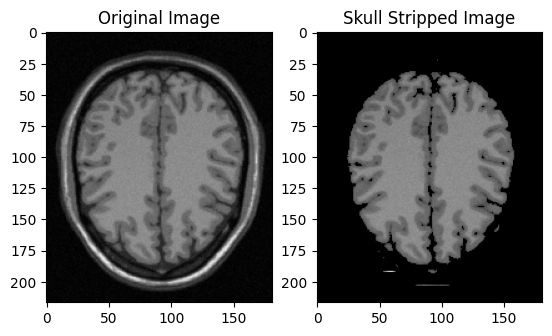

slide  108


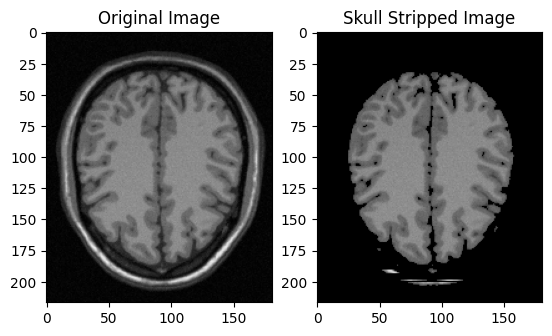

slide  109


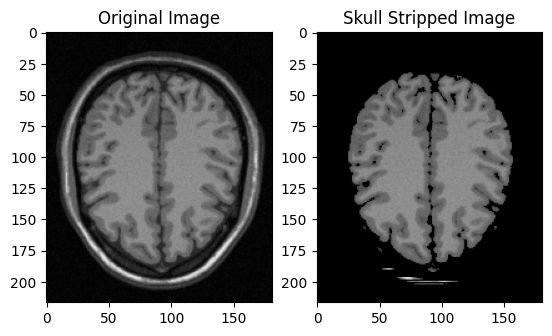

slide  110


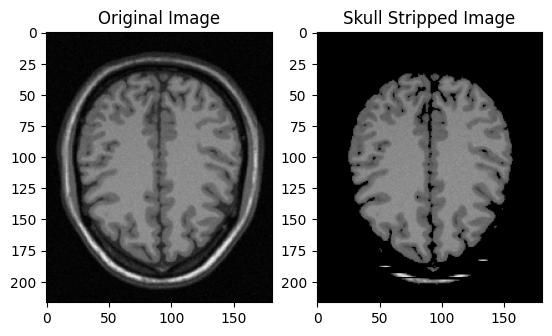

slide  111


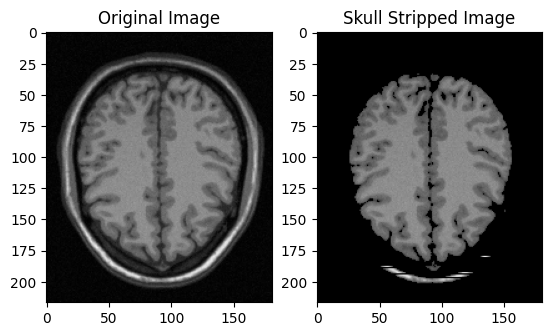

slide  112


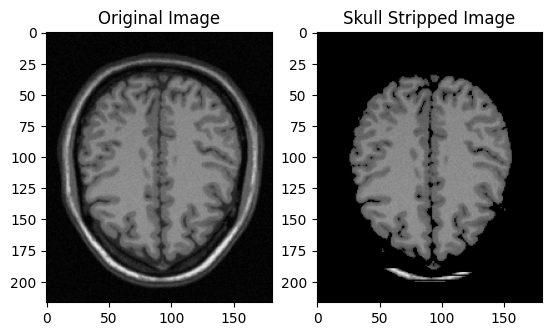

slide  113


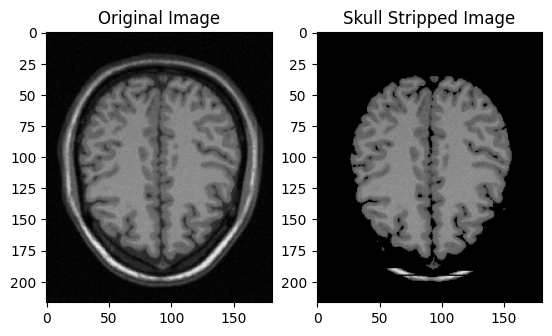

slide  114


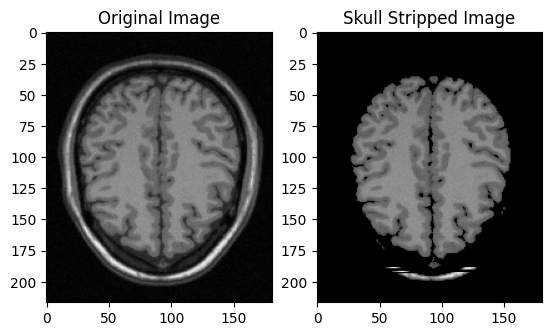

In [ ]:
for i in range(55,115):
  print("slice ",i)
  path = f"/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Pgm/slice_{i}.pgm"
  image = cv2.imread(path)

  path2 = f"/content/drive/MyDrive/Colab Notebooks/SecondSem/Data/Skull Stripped image/skull_stripped_{i}.pgm"
  image2 = cv2.imread(path2)
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(image)
  ax[0].set_title("Original Image")
  ax[1].imshow(image2)
  ax[1].set_title("Skull Stripped Image")
  plt.show()